As of 5/2/2021, combine all the data I have so far and try to get some results we can compare to RL15.

- Bonzini+ 2015 (ECDFS)
    - 1.4 GHz Radio flux densities from Miller+ 2013
    - Matched to the FIR data from the PACS Evolutionary Probe (Lutz+ 2011) with a 1.5arcsec matching radius, following Bonzini, obtaining 480 total sources after removing GOODS+ECDFS duplicate observations
    - Sources in GOODS field will have 70-µm data, and all other ECDFS sources will have 100 or 160-µm FIR data
    
    
- Smolcic+ 2017 (VLA-COSMOS 3-GHz Survey - Continuum data & Multiwavelength catalog)
    - They compute an average spectral index of -0.7, so can reliably convert to 1.4 GHz.
    - Matched to the 100 and 160-µm FIR data from the PACS Evolutionary Probe (Lutz+ 2011) with a 1.5arcsec matching radius, following Bonzini, obtaining >6500 total sources 
    
    
- VLA-SWIRE (Owen)
    - Deep VLA data
    - 70-µm data from Spitzer available

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM

In [2]:
#Equations

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

def luminosity(nu1, nu2, S, alpha, z):
    #calculate luminosity at nu1 based on flux at nu2
    #flux in µJy
    #luminosity in log, W/Hz
    DL = 3.086e24*cosmo.luminosity_distance(z).value
    L = ((4*np.pi*DL**2*(S*1e-23*1e-6)) / ((1+z)**(1+alpha))) * (nu1/nu2)**alpha * 1e-7
    return np.log10(L)

def micron_to_ghz(wavelength):
    #convert wavelength in microns to GHz - easier to input to luminosity() function
    return (3.e8 / (wavelength*1e-6)) * 1e-9

---
###### Bonzini Data (ECDFS)

In [3]:
b13 = pd.read_csv("Bonzini_All_Radio_FIR_GOODS-ECDFS_noidentical.csv")
b13

,Unnamed: 0,fld,Name,MIPS24,RAJ2000_1,DEJ2000_1,F24,e_F24,FP100,e_FP100,...,logLX,logq24o,log_S3_S1_,log_S4_S2_,alphar,BMAG,QF,f_logq24o,Simbad_2,Separation
0,0,b'GOODSS',b'GOODS_J033242.62-273816.3',1,53.177582,-27.637856,177.3,7.6,NaN,NaN,...,44.60,-2.86,0.81,0.74,NaN,NaN,3,0,b'Simbad',0.620430
1,1,b'GOODSS',b'GOODS_J033242.59-273825.9',6,53.177456,-27.640530,1786.5,20.3,46.79,0.79,...,41.09,0.93,0.71,3.70,NaN,-20.67,3,0,b'Simbad',0.179046
2,2,b'GOODSS',b'GOODS_J033231.16-273917.9',55,53.129852,-27.654976,222.8,8.5,3.44,0.45,...,43.56,0.53,0.70,0.86,NaN,NaN,3,0,b'Simbad',0.346486
3,3,b'GOODSS',b'GOODS_J033225.97-273931.1',65,53.108219,-27.658644,90.3,7.9,NaN,NaN,...,42.91,0.43,NaN,NaN,NaN,NaN,2,0,b'Simbad',0.548641
4,4,b'GOODSS',b'GOODS_J033233.55-273929.0',68,53.139786,-27.658045,313.1,9.9,8.87,0.89,...,42.77,0.79,0.67,0.91,NaN,-22.24,1,0,b'Simbad',0.267408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,599,b'ECDFS ',b'PEPPRI_J033252.2-280208 ',9331,53.217777,-28.035644,26.5,5.1,NaN,NaN,...,42.88,-0.38,0.52,0.46,NaN,-24.09,3,0,b'Simbad',0.267801
476,600,b'ECDFS ',b'PEPPRI_J033301.4-280251 ',9345,53.256069,-28.047566,1971.9,20.8,14.21,1.26,...,42.22,1.19,2.87,3.10,NaN,-16.63,3,0,b'Simbad',0.430843
477,601,b'ECDFS ',b'PEPPRI_J033214.6-280219 ',9374,53.061016,-28.038809,621.2,8.7,12.24,1.66,...,41.59,1.09,0.76,2.43,NaN,-21.54,3,0,b'Simbad',0.581422
478,602,b'ECDFS ',b'PEPPRI_J033200.4-280222 ',9382,53.001690,-28.039576,164.6,7.9,5.83,1.17,...,42.30,0.37,0.89,0.73,NaN,-22.52,1,0,b'Simbad',0.256765


In [4]:
b13.columns

Index(['Unnamed: 0', 'fld', 'Name', 'MIPS24', 'RAJ2000_1', 'DEJ2000_1', 'F24',
       'e_F24', 'FP100', 'e_FP100', 'FP160', 'e_FP160', 'Clean', 'fa', 'FP70',
       'e_FP70', 'all', 'recno_1', 'RAJ2000_2', 'DEJ2000_2', 'SNR', 'Sp',
       'e_Sp', 'Si', 'e_Si', 'PAmos', 'Best', 'RMS', 'Ext_', 'FC', 'K08', 'Sk',
       'e_Sk', 'l_Size', 'Size', 'Rem', 'Fig', 'DR1', 'B12', 'Simbad_1',
       'recno_2', 'Separation_1', 'RID', 'RAJ2000', 'DEJ2000', 'Class', 'z',
       'logPr', 'l_logLX', 'logLX', 'logq24o', 'log_S3_S1_', 'log_S4_S2_',
       'alphar', 'BMAG', 'QF', 'f_logq24o', 'Simbad_2', 'Separation'],
      dtype='object')

In [5]:
z_b13 = b13[["z"]].values.flatten()

#Load in flux densities and errors - all radio sources are detections
Srad_b13          = b13[["Si"]].values.flatten() #in µJy
Srad_err_b13      = b13[["e_Si"]].values.flatten()
Sfir_70um_b13     = b13[["FP70"]].values.flatten()*1e-3 #in mJy
Sfir_70um_err_b13 = b13[["e_FP70"]].values.flatten()*1e-3
Sfir_100um_b13    = b13[["FP100"]].values.flatten()*1e-3 #in mJy
Sfir_100um_err_b13= b13[["e_FP100"]].values.flatten()*1e-3
Sfir_160um_b13    = b13[["FP160"]].values.flatten()*1e-3 #in mJy
Sfir_160um_err_b13= b13[["e_FP160"]].values.flatten()*1e-3
Sfir_24um_b13     = b13[["F24"]].values.flatten() #in µJy
Sfir_24um_err_b13 = b13[["e_F24"]].values.flatten()

#For now, only deal with detections - don't yet really know the details of upper limits for each survey
#Detection masks
det70_b13  = ~np.isnan(Sfir_70um_b13)
det100_b13 = ~np.isnan(Sfir_100um_b13)
det160_b13 = ~np.isnan(Sfir_160um_b13)
det24_b13  = ~np.isnan(Sfir_24um_b13)

#Compute luminosities in W/Hz
Lrad_b13 = luminosity(1.4, 1.4, Srad_b13, -0.7, z_b13)
L70_b13  = luminosity(micron_to_ghz(70), micron_to_ghz(70), Sfir_70um_b13[det70_b13], 0.0, z_b13[det70_b13])
L100_b13 = luminosity(micron_to_ghz(100), micron_to_ghz(100), Sfir_100um_b13[det100_b13], 0.0, z_b13[det100_b13])
L160_b13 = luminosity(micron_to_ghz(160), micron_to_ghz(160), Sfir_160um_b13[det160_b13], 0.0, z_b13[det160_b13])
L24_b13  = luminosity(micron_to_ghz(24), micron_to_ghz(24), Sfir_24um_b13[det24_b13], 0.0, z_b13[det24_b13])

RQ_b13 = b13[["Class"]].values.flatten()=="b'RQ AGN'"
RL_b13 = b13[["Class"]].values.flatten()=="b'RL AGN'"
SFG_b13= b13[["Class"]].values.flatten()=="b'SFG   '"

Is there really a big difference between these FIR luminosities?

(array([[  0.,   2.,   9.,  21.,  26.,  21.,   7.,   1.,   0.,   0.],
        [  3.,   5.,  18.,  45.,  98., 114.,  78.,  35.,   3.,   1.],
        [  5.,   9.,  24.,  61., 140., 188., 150.,  99.,  34.,   6.]]),
 array([16.89292456, 17.29746843, 17.7020123 , 18.10655617, 18.51110004,
        18.91564391, 19.32018778, 19.72473165, 20.12927553, 20.5338194 ,
        20.93836327]),
 <a list of 3 BarContainer objects>)

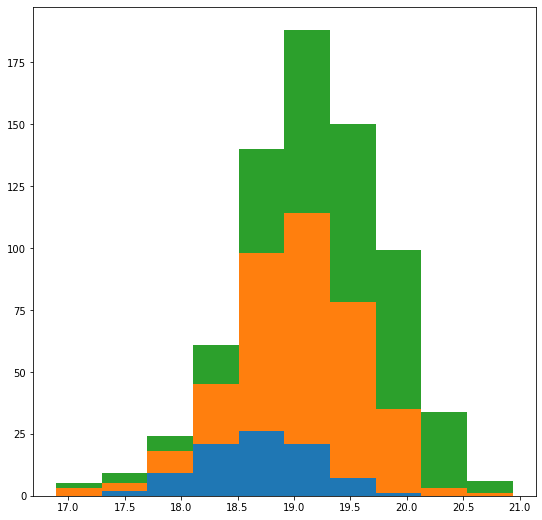

In [6]:
fig = plt.figure(figsize=(9,9))
plt.hist([L70_b13, L100_b13, L160_b13], histtype="barstacked")

A bit different, but appears systematic, so we should be able to do something with this.  70µm data preferred for all, but most data has 100µm, so use just that for now.

In [7]:
SFG_b13[det70_b13].shape, L70_b13.shape

((87,), (87,))

Text(0.5, 1.0, '24µm - N = 480')

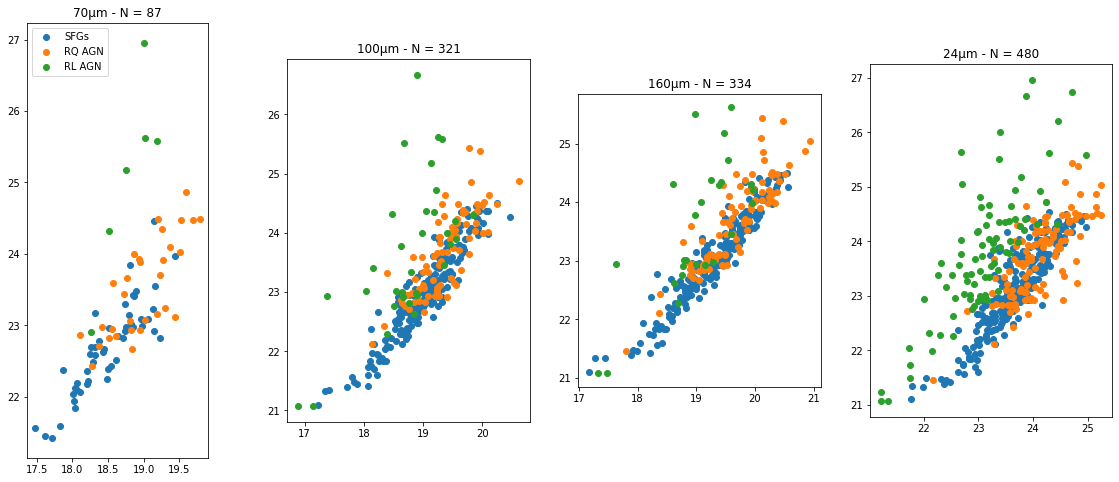

In [8]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, figsize=(20,8))

ax1.scatter(L70_b13[SFG_b13[det70_b13]], Lrad_b13[det70_b13&SFG_b13], label="SFGs")
ax1.scatter(L70_b13[RQ_b13[det70_b13]], Lrad_b13[det70_b13&RQ_b13], label="RQ AGN")
ax1.scatter(L70_b13[RL_b13[det70_b13]], Lrad_b13[det70_b13&RL_b13], label="RL AGN")
ax1.legend(loc="upper left")
ax1.set_aspect("equal")
ax1.set_title("70µm - N = %d" % det70_b13.sum())

ax2.scatter(L100_b13[SFG_b13[det100_b13]], Lrad_b13[det100_b13&SFG_b13])
ax2.scatter(L100_b13[RQ_b13[det100_b13]], Lrad_b13[det100_b13&RQ_b13])
ax2.scatter(L100_b13[RL_b13[det100_b13]], Lrad_b13[det100_b13&RL_b13])
ax2.set_aspect("equal")
ax2.set_title("100µm - N = %d" % det100_b13.sum())

ax3.scatter(L160_b13[SFG_b13[det160_b13]], Lrad_b13[det160_b13&SFG_b13])
ax3.scatter(L160_b13[RQ_b13[det160_b13]], Lrad_b13[det160_b13&RQ_b13])
ax3.scatter(L160_b13[RL_b13[det160_b13]], Lrad_b13[det160_b13&RL_b13])
ax3.set_aspect("equal")
ax3.set_title("160µm - N = %d" % det160_b13.sum())

ax4.scatter(L24_b13[SFG_b13[det24_b13]], Lrad_b13[det24_b13&SFG_b13])
ax4.scatter(L24_b13[RQ_b13[det24_b13]], Lrad_b13[det24_b13&RQ_b13])
ax4.scatter(L24_b13[RL_b13[det24_b13]], Lrad_b13[det24_b13&RL_b13])
ax4.set_aspect("equal")
ax4.set_title("24µm - N = %d" % det24_b13.sum())

That's very good that they all produce roughly the same correlation; for now, that gives me hope that 24-µm WISE data will be usable in this analysis to really increase our numbers.

Also good that the SFGs/RQ/RL separate efficiently at each wavelength - if we incorporate WISE data, we can just use the same color cuts as Bonzini+ do when introducing more data.

Looks like there might be a small Eddington bias from rejecting the FIR non-detections.  Can look at Lusso papers for what increased flux limit to use, or look to incorporate upper limits from FIR.

In [9]:
det_b13 = (det70_b13|det100_b13|det160_b13)

print("Star-forming Galaxies: %3d (%3d detected at >=70um)" % (SFG_b13.sum(), (SFG_b13&det_b13).sum()))
print("Radio-quiet AGN      : %3d (%3d detected at >=70um)" % (RQ_b13.sum(), (RQ_b13&det_b13).sum()))
print("Radio-loud  AGN      : %3d (%3d detected at >=70um)" % (RL_b13.sum(), (RL_b13&det_b13).sum()))

Star-forming Galaxies: 268 (226 detected at >=70um)
Radio-quiet AGN      : 127 (104 detected at >=70um)
Radio-loud  AGN      :  85 ( 35 detected at >=70um)


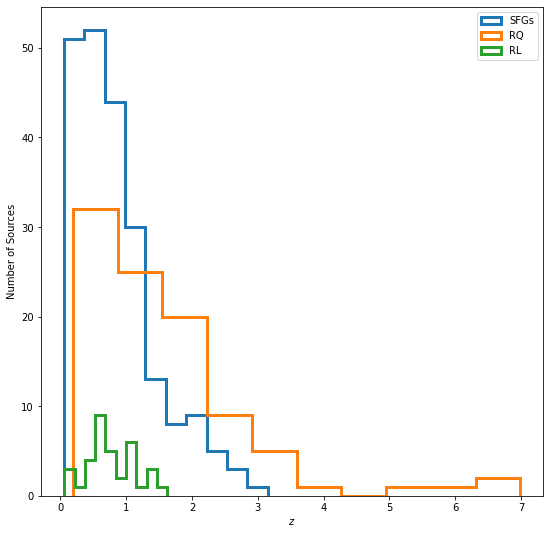

In [10]:
fig = plt.figure(figsize=(9,9))

plt.hist(z_b13[SFG_b13&det_b13], histtype="step", linewidth=3, label="SFGs")
plt.hist(z_b13[RQ_b13&det_b13], histtype="step", linewidth=3, label="RQ")
plt.hist(z_b13[RL_b13&det_b13], histtype="step", linewidth=3, label="RL")
#plt.scatter(LIR[RQ&det], Lr[RQ&det], label="RQ")
#plt.scatter(LIR[RL&det], Lr[RL&det], label="RL")
plt.xlabel("$z$")
plt.ylabel("Number of Sources")
plt.legend(loc="best")
plt.show()

Actually better redshift coverage than I was expecting.  Should think more about why all RL AGN are at z<2.   

---

##### Smolcic+ 2017 data (COSMOS)

In [11]:
dat = Table.read("Smolic2017_RadioFIR_all.fits", format="fits")
cosmos = dat.to_pandas()
cosmos.head()

,ID,---,COSMOSVLA3,RAdeg,e_RAdeg,DEdeg,e_DEdeg,Flux,e_Flux,rms,...,e_FP100,FP160,e_FP160,Clean,fa,FP70,e_FP70,all,recno,Separation
0,5073,b'COSMOSVLA3',b'J095738.95+020253.8',149.412323,0.064,2.048287,0.064,38.799999,5.0,4.59,...,2.16,40.97,3.70,0,0,NaN,NaN,b'all',17307,0.252547
1,5006,b'COSMOSVLA3',b'J095739.00+022507.3',149.412521,0.064,2.418709,0.064,39.900002,5.2,4.75,...,1.66,29.33,5.21,1,0,NaN,NaN,b'all',39410,0.093289
2,3073,b'COSMOSVLA3',b'J095739.62+020237.5',149.415100,0.045,2.043777,0.045,56.200001,5.6,4.65,...,1.91,26.06,3.46,11,0,NaN,NaN,b'all',37875,0.247267
3,7033,b'COSMOSVLA3',b'J095739.80+024144.3',149.415833,0.081,2.695665,0.081,29.799999,4.8,4.49,...,NaN,NaN,NaN,2,0,NaN,NaN,b'all',47874,0.272821
4,10198,b'COSMOSVLA3',b'J095739.94+021441.8',149.416428,0.100,2.244969,0.100,22.799999,4.6,4.39,...,NaN,NaN,NaN,1,0,NaN,NaN,b'all',8240,0.511000


In [12]:
cosmos.columns

Index(['ID', '---', 'COSMOSVLA3', 'RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg',
       'Flux', 'e_Flux', 'rms', 'SNR', 'Npix', 'Res', 'Multi_1', 'id_vla',
       'ra', 'dec', 'multi_2', 'cat_cpt', 'id_cpt', 'ra_cpt_j2000',
       'dec_cpt_j2000', 'sep_vla_cpt', 'p_false', 'z_best', 'flux_int_3ghz',
       'lradio_10cm', 'lradio_21cm', 'l_tir_sf', 'sfr_kenn98', 'xray_agn',
       'mir_agn', 'sed_agn', 'quiescent_mlagn', 'sfg', 'clean_sfg', 'hlagn',
       'mlagn', 'radio_excess', 'flag_cosmos2015', 'Separation_1', 'fld',
       'Name', 'MIPS24', 'RAJ2000', 'DEJ2000', 'F24', 'e_F24', 'FP100',
       'e_FP100', 'FP160', 'e_FP160', 'Clean', 'fa', 'FP70', 'e_FP70', 'all',
       'recno', 'Separation'],
      dtype='object')

In [13]:
z_cos = cosmos[["z_best"]].values.flatten()

cosmos = cosmos[(z_cos>-1)] #only take objects with known redshifts

#Redefine z with new dataframe
z_cos = cosmos[["z_best"]].values.flatten()

#Load in flux densities and errors - all radio sources are detections
Srad_cos          = cosmos[["Flux"]].values.flatten() #in µJy, at 3 GHz
Srad_err_cos      = cosmos[["e_Flux"]].values.flatten()
Sfir_70um_cos     = cosmos[["FP70"]].values.flatten()*1e-3 #in mJy
Sfir_70um_err_cos = cosmos[["e_FP70"]].values.flatten()*1e-3
Sfir_100um_cos    = cosmos[["FP100"]].values.flatten()*1e-3 #in mJy
Sfir_100um_err_cos= cosmos[["e_FP100"]].values.flatten()*1e-3
Sfir_160um_cos    = cosmos[["FP160"]].values.flatten()*1e-3 #in mJy
Sfir_160um_err_cos= cosmos[["e_FP160"]].values.flatten()*1e-3
Sfir_24um_cos     = cosmos[["F24"]].values.flatten() #in µJy
Sfir_24um_err_cos = cosmos[["e_F24"]].values.flatten()

#For now, only deal with detections - don't yet really know the details of upper limits for each survey
#Detection masks
det70_cos  = ~np.isnan(Sfir_70um_cos)
det100_cos = ~np.isnan(Sfir_100um_cos)
det160_cos = ~np.isnan(Sfir_160um_cos)
det24_cos  = ~np.isnan(Sfir_24um_cos)

#Initialize luminosities - sizes of input arrays now cause overflow errors
Lrad_cos = np.zeros(len(Srad_cos))
L100_cos = np.zeros(len(Sfir_100um_cos[det100_cos]))
L160_cos = np.zeros(len(Sfir_160um_cos[det160_cos]))
L24_cos  = np.zeros(len(Sfir_24um_cos[det24_cos]))

#Compute luminosities in W/Hz
for i in range(len(Lrad_cos)):
    Lrad_cos[i] = luminosity(1.4, 3., Srad_cos[i], -0.7, z_cos[i]) #at 3GHz
for i in range(len(L100_cos)):
    L100_cos[i] = luminosity(micron_to_ghz(100), micron_to_ghz(100), Sfir_100um_cos[det100_cos][i], 0.0, z_cos[det100_cos][i])
for i in range(len(L160_cos)):
    L160_cos[i] = luminosity(micron_to_ghz(160), micron_to_ghz(160), Sfir_160um_cos[det160_cos][i], 0.0, z_cos[det160_cos][i])  
for i in range(len(L24_cos)):
    L24_cos[i] = luminosity(micron_to_ghz(24), micron_to_ghz(24), Sfir_24um_cos[det24_cos][i], 0.0, z_cos[det24_cos][i])

AGN_cos = cosmos[["clean_sfg"]].values.flatten()==False
SFG_cos= cosmos[["clean_sfg"]].values.flatten()==True

(array([[0.000e+00, 0.000e+00, 0.000e+00, 9.000e+00, 5.300e+01, 3.650e+02,
         1.256e+03, 1.433e+03, 4.280e+02, 6.000e+00],
        [1.000e+00, 0.000e+00, 0.000e+00, 9.000e+00, 8.500e+01, 5.490e+02,
         1.922e+03, 2.741e+03, 1.441e+03, 9.900e+01]]),
 array([14.69866017, 15.34295625, 15.98725234, 16.63154842, 17.27584451,
        17.92014059, 18.56443668, 19.20873276, 19.85302885, 20.49732493,
        21.14162102]),
 <a list of 2 BarContainer objects>)

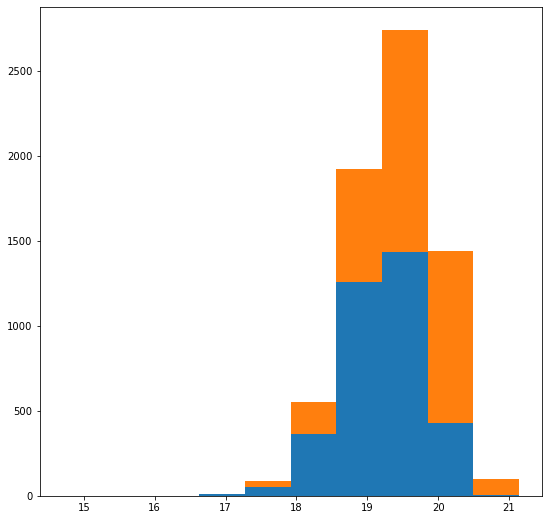

In [14]:
fig = plt.figure(figsize=(9,9))
plt.hist([L100_cos, L160_cos], histtype="barstacked")

Text(0.5, 1.0, '24µm - N = 6675')

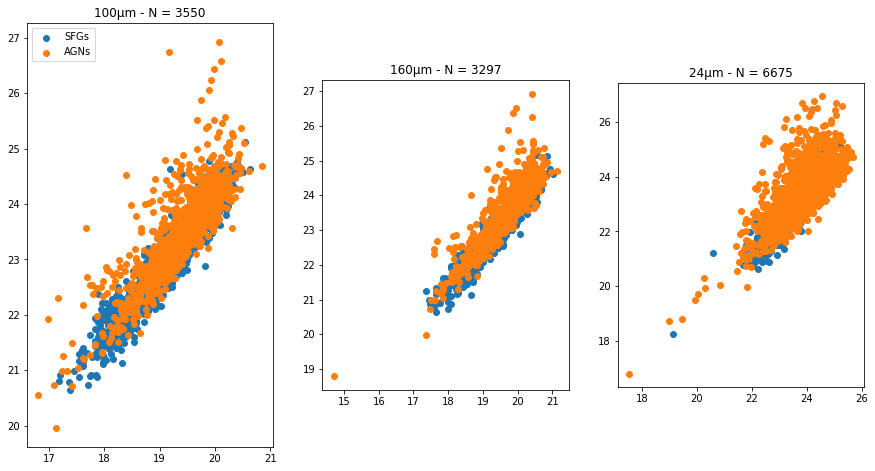

In [15]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(15,8))

ax1.scatter(L100_cos[SFG_cos[det100_cos]], Lrad_cos[det100_cos&SFG_cos], label="SFGs")
ax1.scatter(L100_cos[AGN_cos[det100_cos]], Lrad_cos[det100_cos&AGN_cos], label="AGNs")
ax1.set_aspect("equal")
ax1.set_title("100µm - N = %d" % det100_cos.sum())
ax1.legend(loc="best")

ax2.scatter(L160_cos[SFG_cos[det160_cos]], Lrad_cos[det160_cos&SFG_cos])
ax2.scatter(L160_cos[AGN_cos[det160_cos]], Lrad_cos[det160_cos&AGN_cos])
ax2.set_aspect("equal")
ax2.set_title("160µm - N = %d" % det160_cos.sum())

ax3.scatter(L24_cos[SFG_cos[det24_cos]], Lrad_cos[det24_cos&SFG_cos])
ax3.scatter(L24_cos[AGN_cos[det24_cos]], Lrad_cos[det24_cos&AGN_cos])
ax3.set_aspect("equal")
ax3.set_title("24µm - N = %d" % det24_cos.sum())

So it looks like the $8-1000\mu\mathrm{m}$ integrated flux that Smolcic+ use really does create more separation between SFGs/AGNs

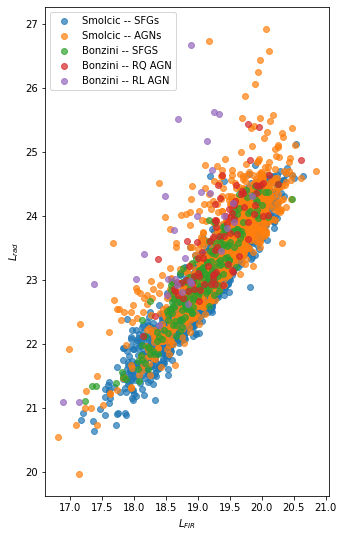

In [16]:
fig = plt.figure(figsize=(9,9))

plt.scatter(L100_cos[SFG_cos[det100_cos]], Lrad_cos[SFG_cos&det100_cos], alpha=0.7, label="Smolcic -- SFGs")
plt.scatter(L100_cos[AGN_cos[det100_cos]], Lrad_cos[AGN_cos&det100_cos], alpha=0.7, label="Smolcic -- AGNs")
plt.scatter(L100_b13[SFG_b13[det100_b13]], Lrad_b13[det100_b13&SFG_b13], alpha=0.7, label="Bonzini -- SFGS")
plt.scatter(L100_b13[RQ_b13[det100_b13]], Lrad_b13[det100_b13&RQ_b13], alpha=0.7, label="Bonzini -- RQ AGN")
plt.scatter(L100_b13[RL_b13[det100_b13]], Lrad_b13[det100_b13&RL_b13], alpha=0.7, label="Bonzini -- RL AGN")
plt.xlabel("$L_{FIR}$")
plt.ylabel("$L_{rad}$")
plt.gca().set_aspect("equal")
plt.legend(loc="best")
plt.show()

Clean up and just look at SFG+RQ

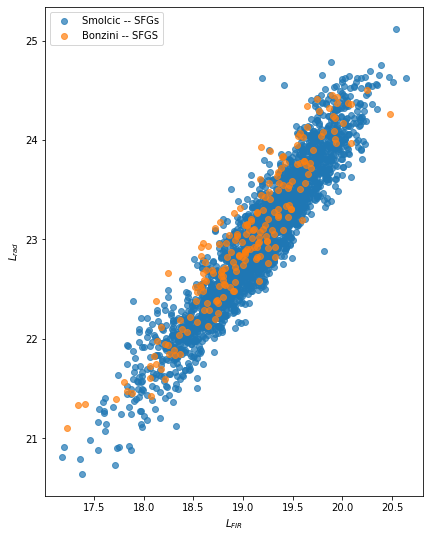

In [17]:
fig = plt.figure(figsize=(9,9))

plt.scatter(L100_cos[SFG_cos[det100_cos]], Lrad_cos[SFG_cos&det100_cos], alpha=0.7, label="Smolcic -- SFGs")
plt.scatter(L100_b13[SFG_b13[det100_b13]], Lrad_b13[det100_b13&SFG_b13], alpha=0.7, label="Bonzini -- SFGS")
#plt.scatter(L100_b13[RQ_b13[det100_b13]], Lrad_b13[det100_b13&RQ_b13], alpha=0.7, label="Bonzini -- RQ AGN")
plt.xlabel("$L_{FIR}$")
plt.ylabel("$L_{rad}$")
plt.gca().set_aspect("equal")
plt.legend(loc="best")
plt.show()

Now combine the data of Bonzini and Smolcic

In [18]:
z = np.concatenate((z_cos[SFG_cos&det100_cos], z_b13[SFG_b13&det100_b13]))

Sfir     = np.concatenate((Sfir_100um_cos[SFG_cos&det100_cos], Sfir_100um_b13[SFG_b13&det100_b13]))
Sfir_err = np.concatenate((Sfir_100um_err_cos[SFG_cos&det100_cos], Sfir_100um_err_b13[SFG_b13&det100_b13]))
Srad     = np.concatenate((Srad_cos[SFG_cos&det100_cos], Srad_b13[SFG_b13&det100_b13]))
Srad_err = np.concatenate((Sfir_100um_err_cos[SFG_cos&det100_cos], Sfir_100um_err_b13[SFG_b13&det100_b13]))

Just realized that we're actual want the log of fluxes.  Then we'll need to convert the errors to log too.

$$  \delta\log{S} = \frac{\delta S}{Sln10}  $$

In [19]:
log_Sfir     = np.log10(Sfir)
log_Sfir_err = Sfir_err / ( Sfir * np.log(10) )
log_Srad     = np.log10(Srad)
log_Srad_err = Srad_err / ( Srad * np.log(10) )

---

Compare with Fig. 2 of RL15

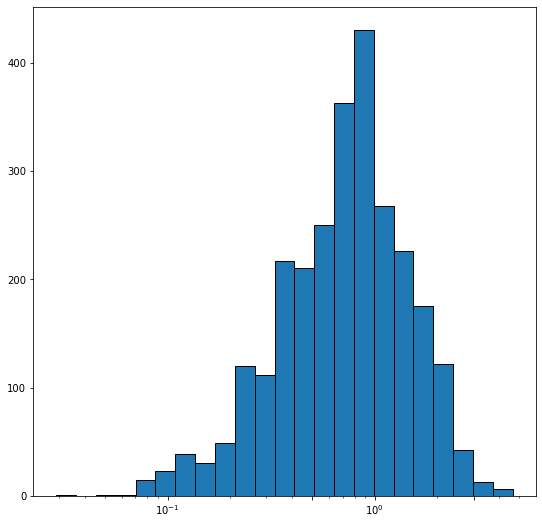

In [20]:
plt.figure(figsize=(9,9))
n, bins, patches = plt.hist(z, edgecolor="k", bins=np.logspace(min(np.log10(z)), max(np.log10(z)), 24))
plt.xscale("log")
plt.xticks([0.1, 0.5, 1, 3])
plt.show()

In [21]:
min(z), max(z), n, bins, np.log10(bins)[1]-np.log10(bins)[0]

(0.028999999165534973,
 4.63730001449585,
 array([  1.,   0.,   1.,   1.,  15.,  23.,  39.,  30.,  49., 120., 112.,
        217., 210., 250., 363., 430., 268., 226., 175., 122.,  42.,  13.,
          6.]),
 array([0.029     , 0.03615916, 0.04508568, 0.05621587, 0.07009374,
        0.08739761, 0.10897324, 0.13587519, 0.16941837, 0.21124226,
        0.26339111, 0.32841383, 0.40948853, 0.51057796, 0.63662307,
        0.79378463, 0.98974428, 1.23408   , 1.53873427, 1.91859779,
        2.39223728, 2.98280297, 3.71916016, 4.63730001]),
 0.09582031341275421)

The above bins will work for analysis, per the requirements laid out by RL15

1) The scatter due to different luminosity distances is smaller than the intrinsic dispersion: bins equally spaced in $\log{z}$ with $\Delta\log{z}\leq0.1$
    
2) Each bin is sufficiently populated for a meaningful check: $N>15$

Compare with Fig. 3 of RL15

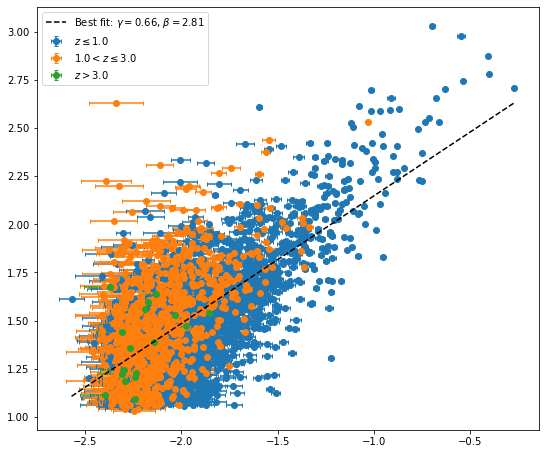

In [22]:
fig = plt.figure(figsize=(9,9))
plt.errorbar(x=log_Sfir[(z<=1)], y=log_Srad[(z<=1)], xerr=log_Sfir_err[(z<=1)], yerr=log_Srad_err[(z<=1)], \
             fmt="o", capsize=2, label="$z\leq1.0$")
plt.errorbar(x=log_Sfir[(z>1)&(z<=3)], y=log_Srad[(z>1)&(z<=3)], xerr=log_Sfir_err[(z>1)&(z<=3)], \
             yerr=log_Srad_err[(z>1)&(z<=3)], fmt="o", capsize=2, label="$1.0<z\leq3.0$")
plt.errorbar(x=log_Sfir[(z>3)], y=log_Srad[(z>3)], xerr=log_Sfir_err[(z>3)], yerr=log_Srad_err[(z>3)], fmt="o", \
             capsize=2, label="$z>3.0$")

#Check of fit for intial guess below
fit = np.polyfit(log_Sfir, log_Srad, 1)
m, b = fit
x = np.linspace(min(log_Sfir), max(log_Sfir), 10)
plt.plot(x, m*x+b, "--k", label="Best fit: $\gamma=$%.2f, $\\beta=$%.2f" % (m, b), zorder=3)

plt.gca().set_aspect("equal")
plt.legend(loc="best")

Eddington bias now obvious.  Until an analysis is up and running, will prob just implement a cut.

----

Now do some ``emcee`` stuff; in particular, what is the dispersion, $\delta$, and how does it compare with that of Lusso/Risaliti's reported value for UV/X-ray

In [23]:
def log_likelihood(theta, x, y, xerr, yerr):
    m, b, log_disp = theta
    model = m*x + b
    sigma2 = xerr**2 + yerr**2 + np.exp(2*log_disp)
    return -1.0 * np.sum( ((y - model)**2 / sigma2) + np.log(sigma2) )

In [24]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([0.9, fit[1], np.log(0.4)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(log_Sfir, log_Srad, log_Sfir_err, log_Srad_err))
m_ml, b_ml, log_disp_ml = soln.x

print("Maximum likelihood estimates:")
print("slope = {0:.3f}".format(m_ml))
print("y-int = {0:.3f}".format(b_ml))
print("disp  = {0:.3f}".format(np.exp(log_disp_ml)))

Maximum likelihood estimates:
slope = 0.673
y-int = 2.830
disp  = 0.215


Pretty good dispersion, but the slope doesn't really accurately represent the data.  Will need to figure out how to deal with non-detection/upper-limit issue.

In [25]:
def log_prior(theta):
    m, b, log_disp = theta
    if 0.45 < m < 1.5 and -2. < b < 5. and np.log10(0.0001) < log_disp < np.log10(0.4):
        return 0.0
    return -np.inf

def log_probability(theta, x, y, xerr, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, xerr, yerr)

In [26]:
import emcee

pos = soln.x + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(log_Sfir, log_Srad, log_Sfir_err, log_Srad_err))
sampler.run_mcmc(pos, 5000, progress=True)

100%|██████████| 5000/5000 [00:11<00:00, 420.66it/s]


State([[ 0.67113002  2.83164005 -1.52780813]
 [ 0.64893432  2.7830679  -1.53511138]
 [ 0.6676881   2.82216739 -1.53610995]
 [ 0.66841313  2.81981759 -1.5273489 ]
 [ 0.66569292  2.81763127 -1.53928707]
 [ 0.67385329  2.83073685 -1.54386264]
 [ 0.65884371  2.80278103 -1.52945068]
 [ 0.68829427  2.85622135 -1.56153259]
 [ 0.65915245  2.80410272 -1.52515246]
 [ 0.67467527  2.82796448 -1.53439442]
 [ 0.66270273  2.81034272 -1.51829268]
 [ 0.67609812  2.84008036 -1.52983072]
 [ 0.67282129  2.83179217 -1.53716759]
 [ 0.68172019  2.85060462 -1.53967846]
 [ 0.65992486  2.80319226 -1.54405256]
 [ 0.67568603  2.83234864 -1.52809301]
 [ 0.68616856  2.85501229 -1.53514754]
 [ 0.68498595  2.85050323 -1.52961533]
 [ 0.65695967  2.79773703 -1.51151975]
 [ 0.66323539  2.81031223 -1.53718889]
 [ 0.67855829  2.84058487 -1.54148584]
 [ 0.671557    2.82738458 -1.52346334]
 [ 0.68374355  2.85050124 -1.53956749]
 [ 0.67283527  2.82688615 -1.55690234]
 [ 0.6737421   2.83363927 -1.53899581]
 [ 0.68017169  2.84

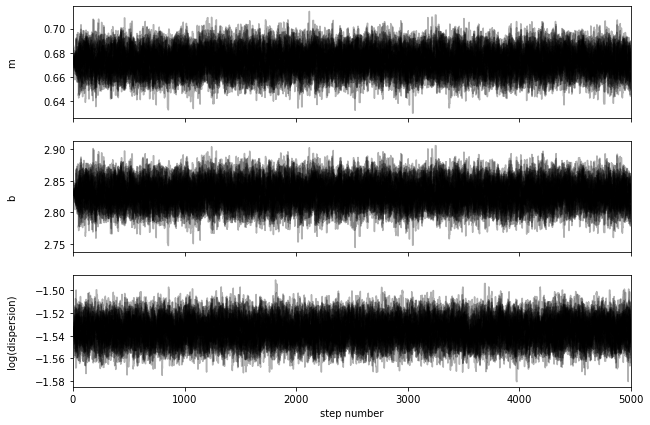

In [27]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["m", "b", "log(dispersion)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [28]:
tau = sampler.get_autocorr_time()
print(tau)

[39.21774479 39.35678741 36.66523519]


In [29]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(10432, 3)


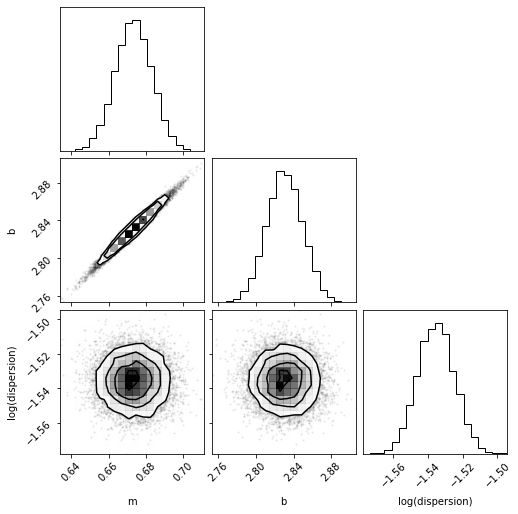

In [30]:
import corner

fig = corner.corner(
    flat_samples, labels=labels
)

In [31]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [32]:
flat_samples[0]

array([ 0.69044704,  2.86292223, -1.52109486])

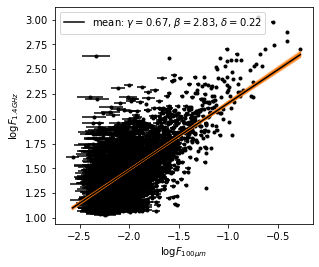

In [33]:
inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x, np.dot(np.vander(x, 2), sample[:2]), "C1", alpha=0.1, zorder=3)
plt.errorbar(x=log_Sfir, y=log_Srad, xerr=log_Sfir_err, yerr=log_Srad_err, fmt=".k", capsize=0)
m_true = np.percentile(flat_samples[:, 0], [50])
b_true = np.percentile(flat_samples[:, 1], [50])
disp_true = np.exp(np.percentile(flat_samples[:, 2], [50]))
plt.plot(x, m_true * x + b_true, "k", label="mean: $\gamma=$%.2f, $\\beta=$%.2f, $\delta=$%.2f" % (m_true, b_true, disp_true), zorder=3)
plt.legend(fontsize=10)
plt.xlabel("$\log{F_{100\mu{m}}}$")
plt.ylabel("$\log{F_{1.4GHz}}$")
plt.gca().set_aspect("equal")

In [34]:
np.vander(x, 2)

array([[-2.57024772,  1.        ],
       [-2.31482501,  1.        ],
       [-2.0594023 ,  1.        ],
       [-1.80397959,  1.        ],
       [-1.54855688,  1.        ],
       [-1.29313417,  1.        ],
       [-1.03771146,  1.        ],
       [-0.78228875,  1.        ],
       [-0.52686603,  1.        ],
       [-0.27144332,  1.        ]])

Q:  For testing separate redshift intervals, do I need to use all of Eq. 2 from RL15, or no $D_\mathrm{L}$ term?  The small redshift bin is such that the difference in $D_\mathrm{L}$ in that bin is smaller than the global dispersion, but in any case including that term is probably a better thing to do when trying to fit $\log{F_\mathrm{Rad}}-\log{F_\mathrm{FIR}}$, since it follows directly from the luminosity relation.

Getting tired, so ignore the $D_\mathrm{L}$ term for now and figure out the integral tomorrow.

In [35]:
#We're going to bin the fluxes according to redshift - this will be an array of arrays
flux_zbins = []

logz = np.logspace(min(np.log10(z)), max(np.log10(z)), 24)

for i in range(len(logz)-1):
    storeflux = []
    
    if n[i-1]<15: #Req. 2 above
        continue
        
    for j in range(1, len(z)):
        if bins[i-1] < z[j] <= bins[i]:
            storeflux.append(j) #save the index - this will then be global to all data arrays
        
    flux_zbins.append(storeflux)
    
flux_zbins = np.array(flux_zbins, dtype=object)

In [36]:
def mcmc_fit(x, y, xerr, yerr, meanz):
    #to plot on the flux grid
    x0 = np.linspace(x.min(), x.max(), 10)
    
    #First just find ML fit for MCMC initialization
    nll = lambda *args: -log_likelihood(*args)
    initial = np.array([0.9, fit[1], np.log(0.4)]) + 0.1 * np.random.randn(3)
    soln = minimize(nll, initial, args=(x, y, xerr, yerr))
    m_ml, b_ml, log_disp_ml = soln.x
    
    #Initalize and run MCMC
    pos = soln.x + 1e-4 * np.random.randn(32, 3)
    nwalkers, ndim = pos.shape

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, xerr, yerr))
    sampler.run_mcmc(pos, 5000, progress=True)
    
    #Remove the "burn-in" period
    tau = sampler.get_autocorr_time()
    flat_samples = sampler.get_chain(discard=int(2*np.mean(tau)), thin=15, flat=True)
    
    #Plot the results
    inds = np.random.randint(len(flat_samples), size=100)
    for ind in inds:
        sample = flat_samples[ind]
        plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "C1", alpha=0.1, zorder=3)
    plt.errorbar(x=x, y=y, xerr=xerr, yerr=yerr, fmt=".k", capsize=0)
    m_true = np.percentile(flat_samples[:, 0], [50])
    b_true = np.percentile(flat_samples[:, 1], [50])
    disp_true = np.exp(np.percentile(flat_samples[:, 2], [50]))
    plt.plot(x0, m_true * x0 + b_true, "k", \
             label="mean z = %.2f: $\gamma=$%.2f, $\\beta=$%.2f, $\delta=$%.2f" % (meanz, m_true, b_true, disp_true), \
             zorder=3)
    plt.legend(fontsize=10)
    plt.xlabel("$\log{F_{100\mu{m}}}$")
    plt.ylabel("$\log{F_{1.4GHz}}$")
    plt.gca().set_aspect("equal")
    plt.show()
    
    #Return gamma+uncertainties, dispersion
    return np.percentile(flat_samples[:, 0], [16, 50, 84]), np.exp(np.percentile(flat_samples[:, 2], [50]))

Want to save the mean gamma and corresponding uncertainties each time mcmc_fit is called.

100%|██████████| 5000/5000 [00:06<00:00, 829.80it/s]


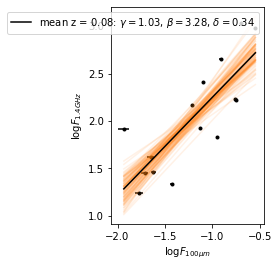

100%|██████████| 5000/5000 [00:06<00:00, 833.16it/s]


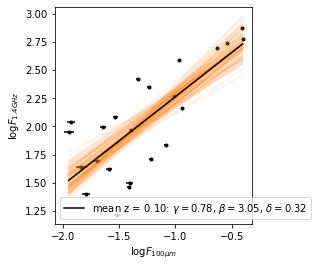

100%|██████████| 5000/5000 [00:06<00:00, 814.78it/s]


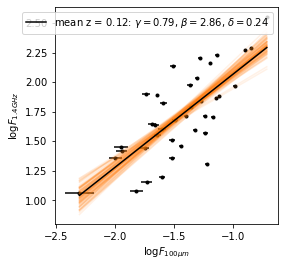

100%|██████████| 5000/5000 [00:06<00:00, 816.07it/s]


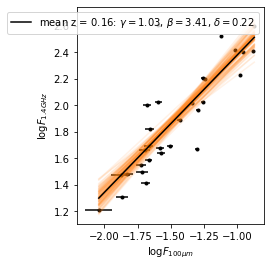

100%|██████████| 5000/5000 [00:06<00:00, 802.76it/s]


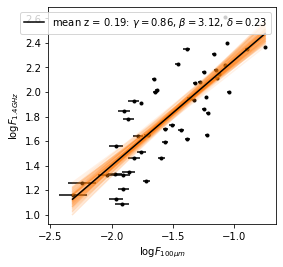

100%|██████████| 5000/5000 [00:06<00:00, 795.99it/s]


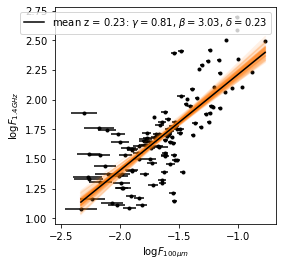

100%|██████████| 5000/5000 [00:06<00:00, 793.05it/s]


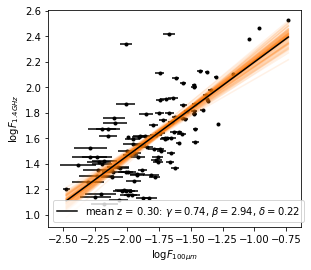

100%|██████████| 5000/5000 [00:06<00:00, 738.50it/s]


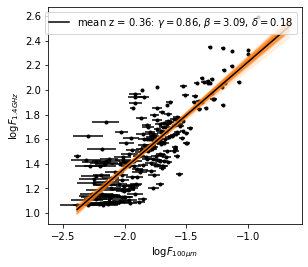

100%|██████████| 5000/5000 [00:06<00:00, 735.91it/s]


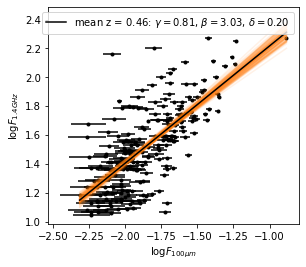

100%|██████████| 5000/5000 [00:06<00:00, 736.63it/s]


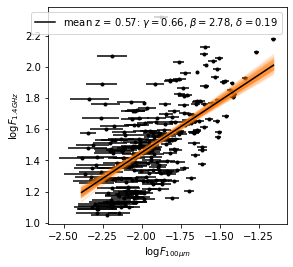

100%|██████████| 5000/5000 [00:07<00:00, 707.26it/s]


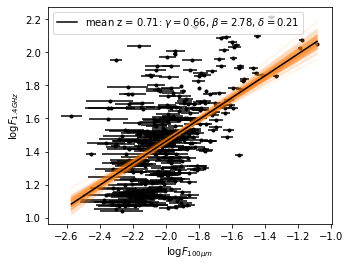

100%|██████████| 5000/5000 [00:07<00:00, 703.99it/s]


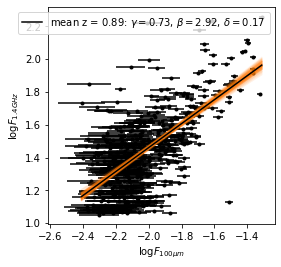

100%|██████████| 5000/5000 [00:06<00:00, 729.86it/s]


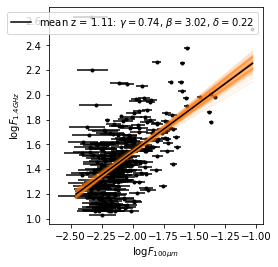

100%|██████████| 5000/5000 [00:06<00:00, 740.02it/s]


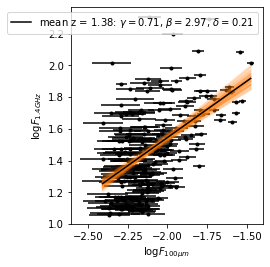

100%|██████████| 5000/5000 [00:06<00:00, 743.88it/s]


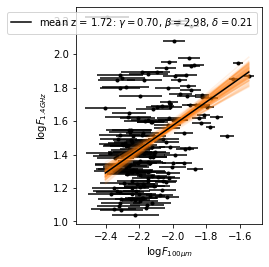

100%|██████████| 5000/5000 [00:06<00:00, 809.34it/s]


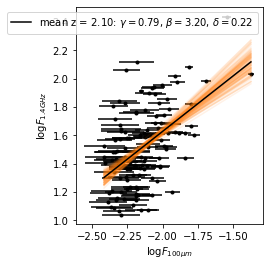

100%|██████████| 5000/5000 [00:05<00:00, 870.70it/s]


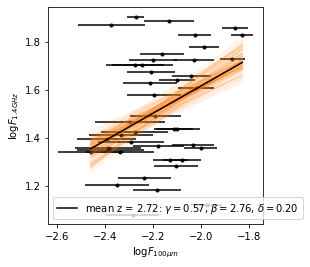

In [37]:
gamma_list   = []
gammaerr_list= []
disp_list    = []

for i in range(len(flux_zbins)):
    F_fir, e_F_fir = log_Sfir[flux_zbins[i]], log_Sfir_err[flux_zbins[i]]
    F_rad, e_F_rad = log_Srad[flux_zbins[i]], log_Srad_err[flux_zbins[i]]
        
    #gamma is an array of 16th, 50th, and 84th percentile
    gamma, disp = mcmc_fit(F_fir, F_rad, e_F_fir, e_F_rad, np.mean(z[flux_zbins[i]]))
    gamma_list.append(gamma[1])
    gammaerr_list.append([abs(gamma[0]-gamma[1]), abs(gamma[2]-gamma[1])])
    disp_list.append(disp)

In [38]:
gamma_list   = np.array(gamma_list).T
gammaerr_list= np.array(gammaerr_list).T
disp_list    = np.array(disp_list).T

Compare the plots above (and below) with Fig. 4 of RL15

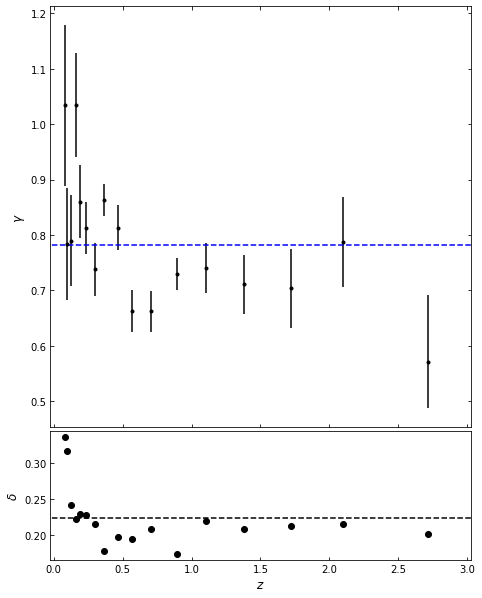

In [39]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.3, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom - 0.2 - spacing, width, 0.2]

# start with a rectangular Figure
plt.figure(figsize=(9, 9))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True, labelbottom=False)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in')

for i in range(len(flux_zbins)):
    ax_scatter.errorbar(x=np.mean(z[flux_zbins[i]]), y=gamma_list[i], yerr=np.array([gammaerr_list[:,i]]).T, fmt=".k")
    
ax_scatter.plot([min(z[flux_zbins[0]])-0.2, max(z[flux_zbins[-1]])+0.1], [np.mean(gamma_list), np.mean(gamma_list)], "--b")
ax_scatter.set_xlim(min(z[flux_zbins[0]])-0.1, max(z[flux_zbins[-1]])+0.05)
ax_scatter.set_ylabel("$\gamma$", fontsize=12)

for i in range(len(flux_zbins)):
    ax_histx.scatter(x=np.mean(z[flux_zbins[i]]), y=disp_list[0][i], color="k")
    
ax_histx.plot([min(z[flux_zbins[0]])-0.2, max(z[flux_zbins[-1]])+0.1], [np.mean(disp_list), np.mean(disp_list)], "--k")
ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histx.set_xlabel("$z$", fontsize=12)
ax_histx.set_ylabel("$\delta$", fontsize=12)
plt.show()

Right now, I don't think the changing slope is necessarily indicative of evolution of the relation, rather our non-detection bias.

---

I think I'm ready to estimate cosmo parameters now (with the present data).  Will first need to work out how to code up that ugly expression for luminosity distance.

In [43]:
def DL_func(z, Om_M, Om_L):
    #store the term inside the integral of DL here for easier integration
    H0 = 70
    Om_K = 1 - Om_M - Om_L
    return 1. / ( H0 * np.sqrt( Om_M*((1+z)**3) + Om_L + Om_K*((1+z)**2) ) )

def DL(z, Om_M, Om_L):
    dz = 0.001
    zlist = np.arange(0, z, 0.01)
    return (1+z) * (dz*DL_func(zlist, Om_M, Om_L)).sum()

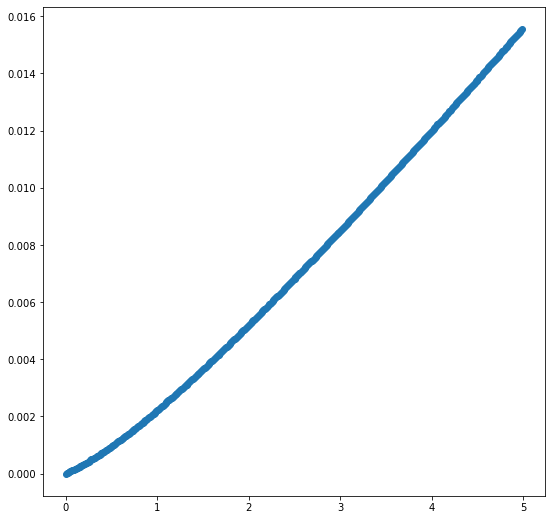

In [48]:
#Do a sanity check to see if DL is coded correctly
Z = np.arange(0, 5, 0.01)
Dlist = np.zeros(len(Z))

for i in range(len(Z)):
    Dlist[i] = DL(Z[i], 0.3, 0.7)

fig = plt.figure(figsize=(9,9))
plt.scatter(Z, Dlist)

Not sure what I'm looking for, but looks like things at least didn't go horribly wrong.

These are the steps to build the Hubble Diagram laid out by Risaliti & Lusso

* Fit the following equation to compute a distance modulus for each source, adopting the values of gamma and its uncertainties from above
    
    $$ \log{F_\mathrm{Rad}} = \gamma\log{F_\mathrm{FIR}} - 2(\gamma - 1)\log{D_L} + \beta' $$,
    
    where $\beta'$ is an arbitrary scaling parameter built into the minimization.
    
* Analytically, distance modulus is just
$$ DM = 5\log{\frac{D_L}{10\mathrm{pc}}} $$

* The DM can be computed through the radio and FIR flux for each object by

$$ DM = \frac{5}{2(\gamma-1)}[\log{F_\mathrm{Rad}} - \gamma\log{F_\mathrm{FIR}} - \beta'] $$

$\beta'$ is different this time, but remains an arbitrary scaling parameter

* Once we have an estimate of DM for each object, we can fit $D_L(\Omega_M, \Omega_\Lambda)$ as a function of redshift, minimizing a likelihood function similar to before (Eq. 4 of RL15).

In [56]:
log_Srad.shape

(2717,)

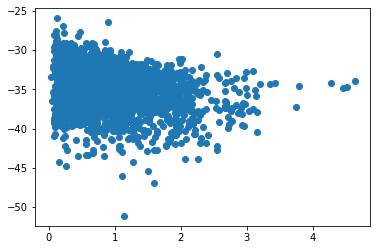

In [62]:
gamma = np.mean(gamma_list)
DM = ( 5 / (2*(gamma-1)) ) * ( log_Srad - gamma*log_Sfir )
#plt.scatter(z[z>1], DM[z>1])
plt.scatter(z, DM)

In [63]:
gamma

0.7819800886335441